<a href="https://colab.research.google.com/github/Harshida9169/DM-1-Programming-Assignment1/blob/main/Kokkinti_DM_Programming_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from skimage import io,color
from skimage import filters
from skimage import exposure
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold , cross_val_score,KFold
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report


import warnings
warnings.filterwarnings("ignore")

In [ ]:
images_folder = r'Images'
dirc=os.listdir(images_folder)

In [ ]:
#Image Processing
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

X = []
Y = []
for idx,name in enumerate(dirc):
    path=os.path.join(images_folder,name)
    for file in os.listdir(path):
        img   = io.imread(os.path.join(path,file.strip()))
        gry_img=color.rgb2gray(img)
        imge = angle(filters.sobel_h(gry_img),filters.sobel_v(gry_img))
        hist,_=exposure.histogram(imge, nbins=36)
        X.append(hist)
        Y.append(idx)
X=np.array(X)
Y=np.array(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42,stratify=Y)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

k_values=[1,3,5,7,10,20]

standard_train_errors=[]
standard_val_errors=[]

standardfold = KFold(n_splits=5)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    train = []
    val= []
    for trainidx, testidx in standardfold.split(X_train_scale, y_train):
        xtrain, xval = X_train_scale[trainidx], X_train_scale[testidx]
        ytrain, yval = y_train[trainidx], y_train[testidx]
        knn.fit(xtrain, ytrain)
        tpred = knn.predict(xtrain)
        vpred = knn.predict(xval)
        taccuracy = accuracy_score(ytrain, tpred)
        vaccuracy = accuracy_score(yval, vpred)
        train.append(1 - taccuracy)
        val.append(1 - vaccuracy)
    standard_train_errors.append(np.mean(train))
    standard_val_errors.append(np.mean(val))



stratified_train_errors=[]
stratified_val_errors=[]


stratifiedfold=StratifiedKFold(n_splits=5)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    train = []
    val= []
    for trainidx, testidx in stratifiedfold.split(X_train_scale, y_train):
        xtrain, xval = X_train_scale[trainidx], X_train_scale[testidx]
        ytrain, yval = y_train[trainidx], y_train[testidx]
        knn.fit(xtrain, ytrain)
        tpred = knn.predict(xtrain)
        vpred = knn.predict(xval)
        taccuracy = accuracy_score(ytrain, tpred)
        vaccuracy = accuracy_score(yval, vpred)
        train.append(1 - taccuracy)
        val.append(1 - vaccuracy)
    stratified_train_errors.append(np.mean(train))
    stratified_val_errors.append(np.mean(val))

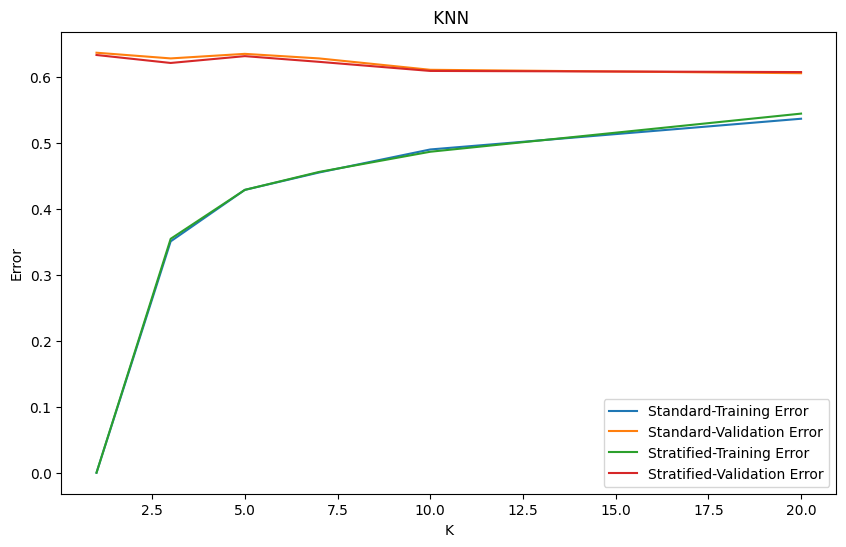

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, standard_train_errors, label='Standard-Training Error')
plt.plot(k_values, standard_val_errors, label='Standard-Validation Error')
plt.plot(k_values, stratified_train_errors, label='Stratified-Training Error')
plt.plot(k_values, stratified_val_errors, label='Stratified-Validation Error')

plt.title(' KNN')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

plt.show()

the lowest mean error :
Standard Training error is at k=1 ,
stratified Training error is at k=1,
standard validation error is at k=20,
Stratified validation error is at k=20


In [ ]:
# The model complexity for k-Nearest Neighbor classifier is Less when k=1,intermediate for k= 3,5,7,10 and high when k= 20


In [ ]:
# our model overfits at k=1 bacause it has less training error and more validation error and  underfits at k=20 since the number of neighbors is large

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scale, y_train)
pred = knn.predict(X_test_scale)
print("Test Error for least mean error of stratifed validation at k= 20 :" +str(1-(accuracy_score(y_test,pred))))

Test Error for least mean error of stratifed validation at k= 20 :0.6095890410958904


In [ ]:
dirc

['n02091831-Saluki',
 'n02093859-Kerry_blue_terrier',
 'n02108551-Tibetan_mastiff',
 'n02111277-Newfoundland']

              precision    recall  f1-score   support

           0       0.37      0.57      0.45        40
           1       0.38      0.36      0.37        36
           2       0.50      0.06      0.11        31
           3       0.37      0.44      0.40        39

    accuracy                           0.38       146
   macro avg       0.41      0.36      0.33       146
weighted avg       0.40      0.38      0.35       146

MLPClassifier(hidden_layer_sizes=(10, 10, 10))
Mean validation accuracy : 0.41724137931034483


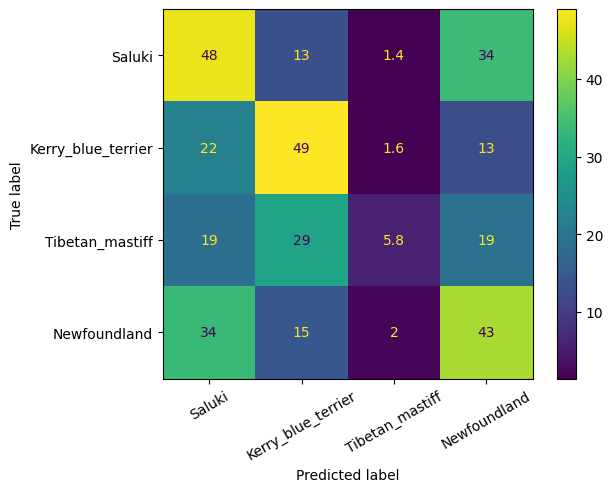

              precision    recall  f1-score   support

           0       0.43      0.45      0.44        40
           1       0.37      0.44      0.41        36
           2       0.55      0.19      0.29        31
           3       0.36      0.46      0.40        39

    accuracy                           0.40       146
   macro avg       0.43      0.39      0.38       146
weighted avg       0.42      0.40      0.39       146

RandomForestClassifier()
Mean validation accuracy : 0.40172413793103445


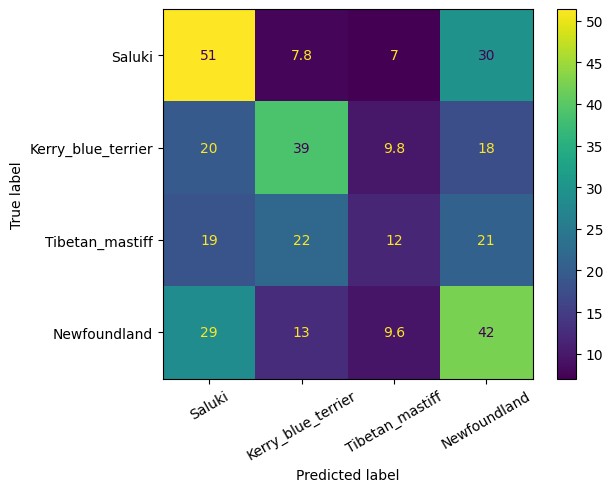

              precision    recall  f1-score   support

           0       0.31      0.95      0.47        40
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        31
           3       0.18      0.10      0.13        39

    accuracy                           0.29       146
   macro avg       0.12      0.26      0.15       146
weighted avg       0.13      0.29      0.16       146

GaussianNB()
Mean validation accuracy : 0.32068965517241377


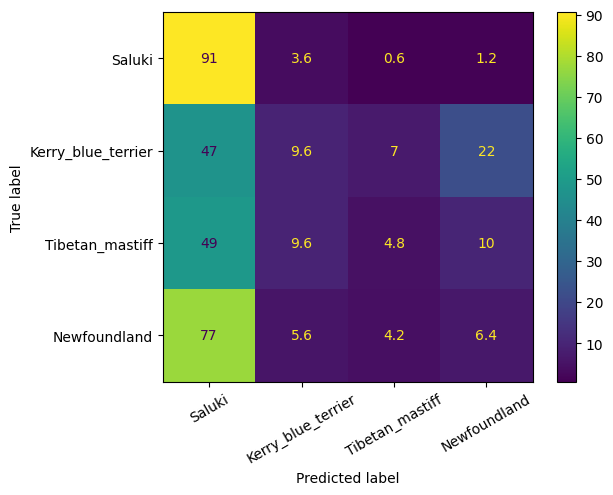

In [ ]:
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

for clasf in [MLPClassifier(hidden_layer_sizes=(10,10,10)),RandomForestClassifier(),GaussianNB()]:
    clasf.fit(X_train_scale,y_train)
    predictions=clasf.predict(X_test_scale)
    report=classification_report(y_test,predictions)
    print(report)
    print(clasf)
    true_labels,predict_labels,c,valaccuracy=[],[],[],[]
    for trainidx, testidx in stratifiedfold.split(X_train_scale, y_train):
        xtrain, xval = X_train_scale[trainidx], X_train_scale[testidx]
        ytrain, yval = y_train[trainidx], y_train[testidx]

        clasf.fit(xtrain,ytrain)
        pred=clasf.predict(xval)

        true_labels.extend(yval)
        predict_labels.extend(pred)
        valaccuracy.append(accuracy_score(yval,pred))
        c.append(confusion_matrix(true_labels,predict_labels))
    print("Mean validation accuracy : "+str(np.mean(valaccuracy)))
    cm_display = ConfusionMatrixDisplay(confusion_matrix = sum(c)/len(c), display_labels = ['Saluki','Kerry_blue_terrier','Tibetan_mastiff','Newfoundland'] )
    cm_display.plot(xticks_rotation=30)
    plt.show()

In [ ]:
### confusion matrix best :MLP as this model classifies precisely with good number of breeds
### mean validation accuracy best : MLP
### Test accuracy best : Random forest
### F1 measure : MLP